# Clustering data

## Importing Libraries

In [59]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt


## Importing data set

In [2]:
data = pd.read_excel('Customer_DATA.xlsx')
print(data.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   50    1               6     156      1.590       1.073   
1            2   23    2               9      88      1.941      32.909   
2            3   64    1               5     270      8.890      18.157   
3            4   82    4              30     387      5.273      22.486   
4            5   20    1              28     131      6.448      25.258   

   Defaulted Address  DebtIncomeRatio  
0        0.0  ABC151             28.9  
1        0.0  ABC152             39.7  
2        1.0  ABC153             37.2  
3        0.0  ABC154              4.8  
4        0.0  ABC155             17.5  


## Checking null values 
Removing non-important features i.e. Id and Address.

Removing Defaulted as it has 20% null values and filling it with mean or most frequent item will affect the results. 

In [3]:
data.isnull().sum()

Customer Id         0
Age                 0
Edu                 0
Years Employed      0
Income              0
Card Debt           0
Other Debt          0
Defaulted          84
Address             0
DebtIncomeRatio     0
dtype: int64

## Checking names of all features

In [4]:
data.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

## Selecting Descriptive Features
- We have removed Id, Age and Defaulted Columns for meaningful Results.

In [66]:
descriptive_features = data[[ 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]
descriptive_features

,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,6,156,1.590,1.073,28.9
1,2,9,88,1.941,32.909,39.7
2,1,5,270,8.890,18.157,37.2
3,4,30,387,5.273,22.486,4.8
4,1,28,131,6.448,25.258,17.5
...,...,...,...,...,...,...
444,3,39,287,5.715,20.102,21.1
445,2,28,158,1.714,4.897,7.0
446,1,9,387,8.126,22.225,11.2
447,1,1,295,8.426,17.871,31.4


## Checking Null values of all descreptive features

In [67]:
descriptive_features.isnull().sum()

Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

In [68]:
descriptive_features

,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,6,156,1.590,1.073,28.9
1,2,9,88,1.941,32.909,39.7
2,1,5,270,8.890,18.157,37.2
3,4,30,387,5.273,22.486,4.8
4,1,28,131,6.448,25.258,17.5
...,...,...,...,...,...,...
444,3,39,287,5.715,20.102,21.1
445,2,28,158,1.714,4.897,7.0
446,1,9,387,8.126,22.225,11.2
447,1,1,295,8.426,17.871,31.4


## Finding the optimum number of clusters for Clustering

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

### Elbow Method
By plotting the within_cluster_sum_of_squares with respect to number of clusters, we look for the elbow in the plot(sudden bend in the line plot). This elbow point indicates the ideal number of clusters.

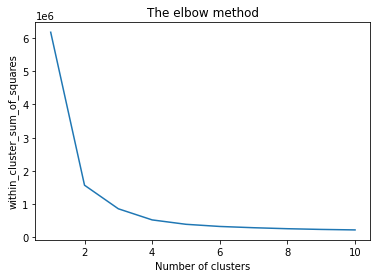

In [69]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


### Silhouette Average
 Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. The higher the score is, higher is the consistency of clusters. Which means similar data points are grouped in a single cluster. We look for the highest score in the range of 2-20 clusters, which ever cluster gives the highest score, it is considered as suitable number of clusters.

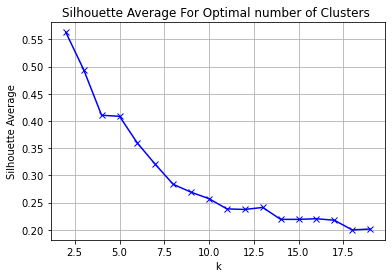

In [70]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

SS_distances= []
I = range(2,20)
for i in I:
       HC = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
       HC= HC.fit(descriptive_features)
       score_H= metrics.silhouette_score(descriptive_features, HC.labels_)
       SS_distances.append(score_H)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
#HC = AgglomerativeClustering(distance_threshold=40,n_clusters=None, affinity='euclidean', linkage='ward')


## K means with 2 clusters

In [71]:
# Train k_means using optimal number of clusters
k_means = KMeans(n_clusters=2)
k_means= k_means.fit(descriptive_features)


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_
label

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,

## Agglomerative Clustering with 2 clusters

In [72]:
# Now use optimal Silhouette to choose # clusters which is 2
HC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
HC.fit(descriptive_features)
labels = HC.labels_
labels

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## BIRCH Clustering with 2 clusters

In [73]:

from sklearn.cluster import Birch
birch= Birch(n_clusters=2)
birch.fit(descriptive_features)
birch.labels_



array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Text(0, 0.5, 'Silhouette scores')

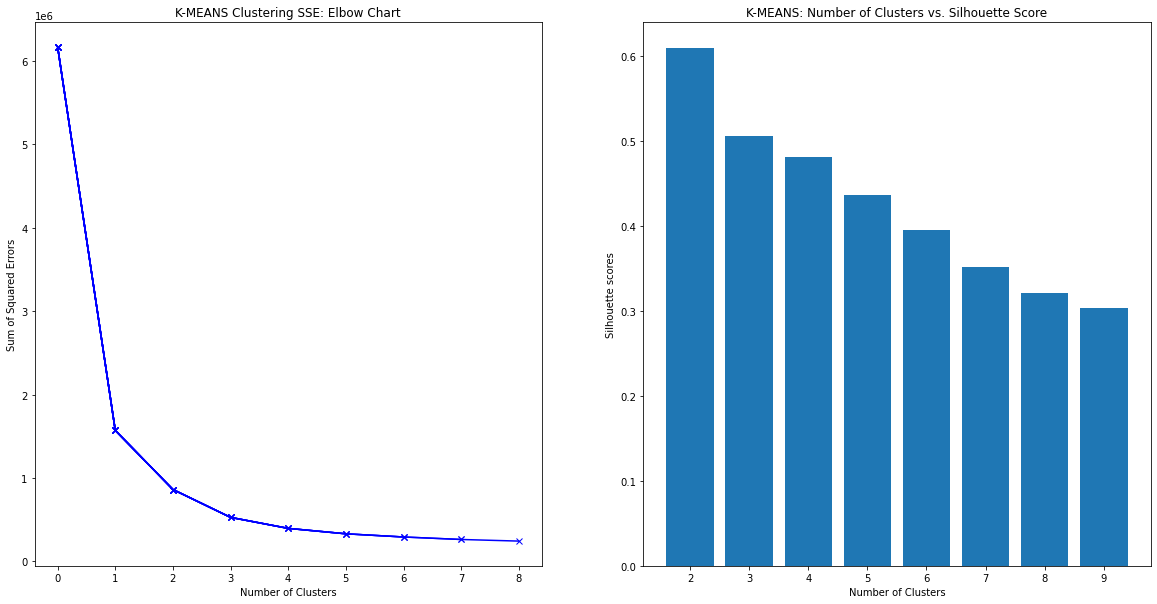

In [74]:
figure = plt.figure(figsize=(20, 10))
elbow = figure.add_subplot(1,2,1) #elbow plot
kmean_s = figure.add_subplot(1,2,2) #silhouette plot

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(descriptive_features)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors')
    elbow.set_xlabel('Number of Clusters')
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart')
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        metrics.silhouette_score(descriptive_features, KMeans(n_clusters = n_cluster).fit_predict(descriptive_features))) 
    
k = [2, 3, 4, 5, 6,7, 8, 9] 
kmean_s.bar(k, silhouette_scores) 
kmean_s.set_title('K-MEANS: Number of Clusters vs. Silhouette Score')
kmean_s.set_xlabel('Number of Clusters') 
kmean_s.set_ylabel('Silhouette scores') 

## Evaluation Scores for all 3 clustering methods

In [75]:
from sklearn import metrics
score_HC = metrics.silhouette_score(descriptive_features, HC.labels_)
score_KM = metrics.silhouette_score(descriptive_features, k_means.labels_)
score_Birch = metrics.silhouette_score(descriptive_features, birch.labels_)

print('Silhouette Score for Hierarchical Clustering is: ',score_HC*100 )
print('Silhouette Score for K-means Clustering is: ',score_KM*100 )
print('Silhouette Score for BIRCH Clustering is: ',score_Birch*100 )


Silhouette Score for Hierarchical Clustering is:  56.30462228552686
Silhouette Score for K-means Clustering is:  60.95298923527616
Silhouette Score for BIRCH Clustering is:  56.30462228552686


## K-Means clustering performed better than other 2 clustering methods